<a href="https://colab.research.google.com/github/GabrielaSouza2/datascience/blob/main/avaliacao_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://dados.gov.br/dados/conjuntos-dados/docentes7
#link da base de dados

In [ ]:
#carregando os dados
dados = pd.read_csv('/content/drive/My Drive/Data Science/docentes-perfil-ufpe-2022.csv')

#Data frame do perfil dos professores da Universidade Federal de Pernambuco em 2022


In [ ]:
dados.head()

,ID,SEXO,NASCIMENTO,ID_ESCOLARIDADE,ESCOLARIDADE,REGIME_TRABALHO,ID_UNIDADE,SIGLA_UNIDADE,UNIDADE,MES_REFERENCIA
0,12,F,1967,14,DOUTORADO,DE,79,DEPOCE,DEPARTAMENTO DE OCEANOGRAFIA,07/2022
1,54,M,1946,14,DOUTORADO,40,1792,DIRCCM,DIRETORIA DO CENTRO DE CIÊNCIAS MÉDICAS,07/2022
2,97,M,1957,13,MESTRADO,20,41,DEPCCA,DEPARTAMENTO DE CIÊNCIAS CONTÁBEIS E ATUARIAIS,07/2022
3,114,M,1942,12,ESPECIALIZACAO,DE,113,DEPEF,DEPARTAMENTO DE EDUCAÇÃO FÍSICA,07/2022
4,131,M,1968,14,DOUTORADO,DE,66,DM,DEPARTAMENTO DE MATEMÁTICA,07/2022


In [ ]:
print('A base de dados apresenta {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

A base de dados apresenta 7747 linhas e 10 colunas


#Tipo dos dados 

In [ ]:
dados.dtypes

ID                  int64
SEXO               object
NASCIMENTO          int64
ID_ESCOLARIDADE     int64
ESCOLARIDADE       object
REGIME_TRABALHO    object
ID_UNIDADE          int64
SIGLA_UNIDADE      object
UNIDADE            object
MES_REFERENCIA     object
dtype: object

Dados nulos

In [ ]:
dados.isna().sum()

ID                 0
SEXO               0
NASCIMENTO         0
ID_ESCOLARIDADE    0
ESCOLARIDADE       0
REGIME_TRABALHO    0
ID_UNIDADE         0
SIGLA_UNIDADE      0
UNIDADE            0
MES_REFERENCIA     0
dtype: int64

Já que não existem dados nulos na base de dados não será necessário fazer a limpeza.

#Distribuição dos sexos dos docentes

In [ ]:
dados.SEXO.value_counts()

F    3921
M    3826
Name: SEXO, dtype: int64

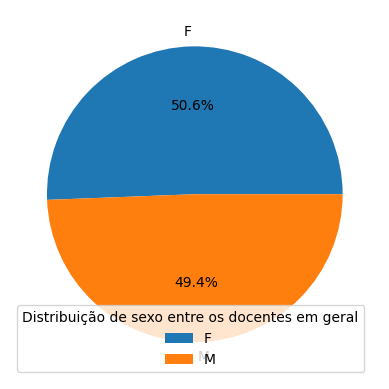

In [ ]:
cont = dados.SEXO.value_counts()
labels = cont.index.tolist()
valores = cont.values.tolist()
plt.pie(valores, labels=labels, autopct='%1.1f%%')

plt.legend(title='Distribuição de sexo entre os docentes em geral', loc='best')

plt.show()

É possível perceber que temos mais docentes do sexo feminino do que do masculino.

#Top 5 de núcleos que possuem mais docentes

In [ ]:
dados.UNIDADE.value_counts().head(10)

DIRETORIA DO CENTRO DE CIÊNCIAS MÉDICAS    489
DEPARTAMENTO DE LETRAS                     247
NÚCLEO DE FORMAÇÃO DE DOCENTES DO CA       236
NÚCLEO DE CIÊNCIAS DA VIDA DO CA           223
CENTRO DE INFORMÁTICA                      193
DEPARTAMENTO DE ENFERMAGEM                 188
DEPARTAMENTO DE ENSINO E CURRICULO         188
NÚCLEO DE GESTÃO DO CA                     179
COLÉGIO DE APLICAÇÃO                       178
NÚCLEO DE ENFERMAGEM - CAV                 167
Name: UNIDADE, dtype: int64

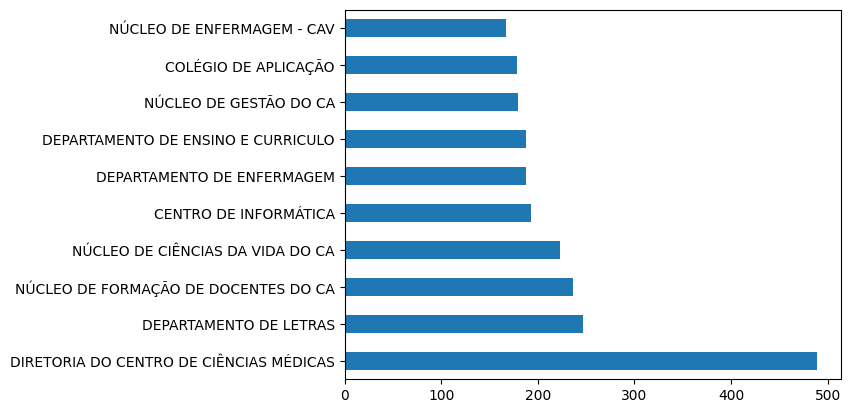

In [ ]:
#ler de baixo para cima
dados.UNIDADE.value_counts().head(10).plot(kind='barh')
plt.show()

##Top 5 de núcleos que possuem menos docentes

In [ ]:
dados.UNIDADE.value_counts().tail()

COORDENAÇÃO DA GRADUAÇÃO EM ENGENHARIA DE ENERGIA        2
HOSPITAL DAS CLÍNICAS - SUPERINTENDÊNCIA                 2
DIRETORIA DO CENTRO DE ARTES E COMUNICAÇÃO               2
COORDENAÇÃO DA GRADUAÇÃO EM LICENCIATURA FÍSICA DO CA    1
CENTRO ACADÊMICO DO AGRESTE                              1
Name: UNIDADE, dtype: int64

In [ ]:
#dados.UNIDADE.value_counts().tail()
dados.UNIDADE.loc[dados.UNIDADE.value_counts()]

489    DEPARTAMENTO DE ENGENHARIA ELÉTRICA E SISTEMAS...
247                       DEPARTAMENTO DE SERVIÇO SOCIAL
236                               DEPARTAMENTO DE FÍSICA
223              DIRETORIA DO CENTRO DE CIÊNCIAS MÉDICAS
193                   DEPARTAMENTO DE ENGENHARIA QUÍMICA
                             ...                        
2         DEPARTAMENTO DE CIÊNCIAS CONTÁBEIS E ATUARIAIS
2         DEPARTAMENTO DE CIÊNCIAS CONTÁBEIS E ATUARIAIS
2         DEPARTAMENTO DE CIÊNCIAS CONTÁBEIS E ATUARIAIS
1                DIRETORIA DO CENTRO DE CIÊNCIAS MÉDICAS
1                DIRETORIA DO CENTRO DE CIÊNCIAS MÉDICAS
Name: UNIDADE, Length: 98, dtype: object

#Quantidade de unidades onde os docentes estão alocados

In [ ]:
dados.UNIDADE.value_counts().shape

(98,)

No total existem 98 núcleos onde os professores podem ser alocados.

#Distribuição dos docentes entre sexos nas unidades
 

In [ ]:
dados.groupby('UNIDADE')['SEXO'].value_counts().head(21)

UNIDADE                                                    SEXO
CENTRO ACADÊMICO DE VITÓRIA - DIRETORIA                    F        12
                                                           M         6
CENTRO ACADÊMICO DO AGRESTE                                F         1
CENTRO DE CIÊNCIAS JURÍDICAS                               M        80
                                                           F        44
CENTRO DE CIÊNCIAS MÉDICAS                                 F        14
                                                           M         8
CENTRO DE INFORMÁTICA                                      M       157
                                                           F        36
COLÉGIO DE APLICAÇÃO                                       F        96
                                                           M        82
COORDENAÇÃO DA GRADUAÇÃO EM ENGENHARIA DE ENERGIA          F         2
COORDENAÇÃO DA GRADUAÇÃO EM LICENCIATURA FÍSICA DO CA      M         1
DEPARTAMENTO 

#Número de docentes do sexo feminino por núcleo

In [ ]:
dados.UNIDADE[dados['SEXO'].str.contains('F')].value_counts()

DIRETORIA DO CENTRO DE CIÊNCIAS MÉDICAS                      224
DEPARTAMENTO DE ENFERMAGEM                                   170
DEPARTAMENTO DE LETRAS                                       154
NÚCLEO DE ENFERMAGEM - CAV                                   142
NÚCLEO DE FORMAÇÃO DE DOCENTES DO CA                         133
                                                            ... 
DEPARTAMENTO DE CIÊNCIA DA COMPUTAÇÃO                          2
DEPARTAMENTO DE NEUROPSIQUIATRIA                               2
DEPARTAMENTO DE MEDICINA SOCIAL                                2
DEPARTAMENTO DA TEORIA GERAL DO DIREITO E DIREITO PRIVADO      2
CENTRO ACADÊMICO DO AGRESTE                                    1
Name: UNIDADE, Length: 93, dtype: int64

#Quantidade de docentes por unidade 

In [ ]:
dados.UNIDADE[dados['UNIDADE'].str.contains('DEPARTAMENTO DE ENFERMAGEM')].value_counts()

DEPARTAMENTO DE ENFERMAGEM    188
Name: UNIDADE, dtype: int64

Aqui consigo filtrar a quantidade de docentes por unidade, apenas preciso alterar o campo de busca, que nesse caso é onde contém "DEPARTAMENTO DE ENFERMAGEM", para caso precise saber a informação de docentes na unidade. 

#Número de docentes do sexo masculino por núcleo



In [ ]:
dados.UNIDADE[dados['SEXO'].str.contains('M')].value_counts()

DIRETORIA DO CENTRO DE CIÊNCIAS MÉDICAS                  265
CENTRO DE INFORMÁTICA                                    157
DEPARTAMENTO DE ENGENHARIA MECÂNICA                      131
DEPARTAMENTO DE MATEMÁTICA                               125
DEPARTAMENTO DE FÍSICA                                   122
                                                        ... 
DEPARTAMENTO MATERNO INFANTIL                              2
DEPARTAMENTO DE MEDICINA TROPICAL                          2
NÚCLEO DE ACESSIBILIDADE DA UFPE                           2
DEPARTAMENTO DE DIREITO PÚBLICO ESPECIALIZADO              2
COORDENAÇÃO DA GRADUAÇÃO EM LICENCIATURA FÍSICA DO CA      1
Name: UNIDADE, Length: 92, dtype: int64

Número de docentes do sexo masculino por núcleo, é gritante a diferença em algum centros, especialmente em alguns de exatas, como no centro de informática, que possui 193 docentes em seu total e se 157 são do sexo masculino, apenas 36 são do sexo feminino, o mesmo com o departamento de física, que possui 141 docentes e apenas 19 são mulheres, mesmo em departamentos onde as mulheres são maioria, como no de letras a discrepância não é tão grande, sendo no de letras 154 mulheres para 93 homens, o departamento de enfermagem tem um quadro fora da curva, pois possui 188 docentes em seu total, sendo 170 mulheres e 18 homens, mas é um ponto fora da curva. 

#Quantificação dos docentes em cada grau de escolaridade


In [ ]:
dados.ESCOLARIDADE.value_counts()

DOUTORADO                                            5517
MESTRADO                                             1595
ESPECIALIZACAO                                        291
GRADUACAO                                             145
ENSINO SUPERIOR                                       142
MESTRE                                                 42
POS-GRADUACAO-RSC-II LEI 12772/12 ART 18               11
POS-GRADUACAO                                           2
GRADUACAO+RSC-I (LEI 12772/12 ART. 18)                  2
Name: ESCOLARIDADE, dtype: int64

In [ ]:
#dados.groupby('UNIDADE')['SEXO'].value_counts().head().plot(kind='hist')

<Axes: >

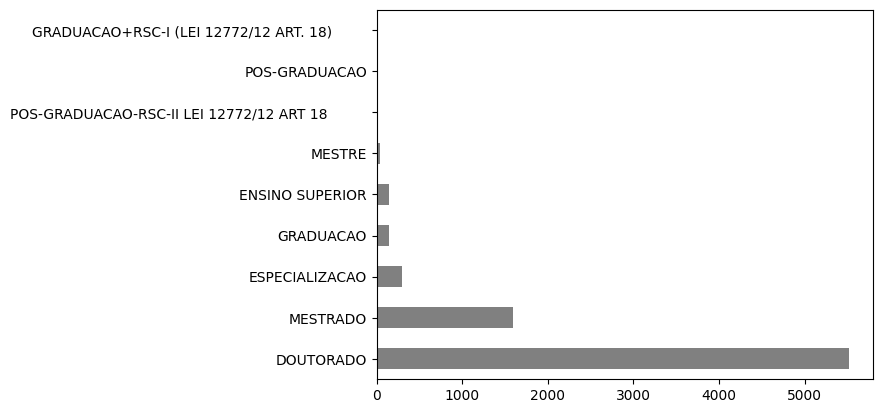

In [ ]:
dados.ESCOLARIDADE.value_counts().plot(kind='barh', color='gray')

<Axes: ylabel='ESCOLARIDADE,SEXO'>

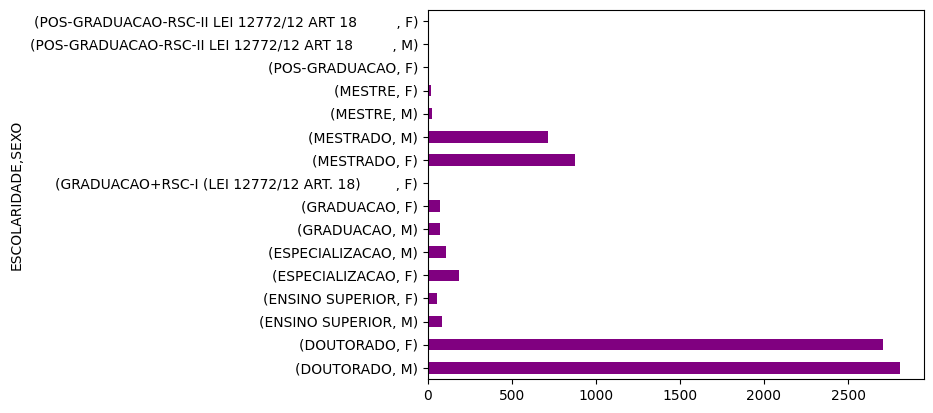

In [ ]:
dados.groupby('ESCOLARIDADE')['SEXO'].value_counts().plot(kind='barh', color='purple')

É possível perceber que doutores do que doutoras, mas o número dá uma equilibrada pra que existem mais mulheres mestras e especialistas.

#Regime de trabalho de cada docente
Ler:
* DE - dedicação exclusiva
* 40 - 40 horas
* 30 - 30 horas
* 20 - 20 horas




In [ ]:
dados.REGIME_TRABALHO.value_counts()

DE    4912
40    1670
20    1163
30       2
Name: REGIME_TRABALHO, dtype: int64

Text(0.5, 1.0, 'Gráfico de regime de trabalho x quantidade de docentes')

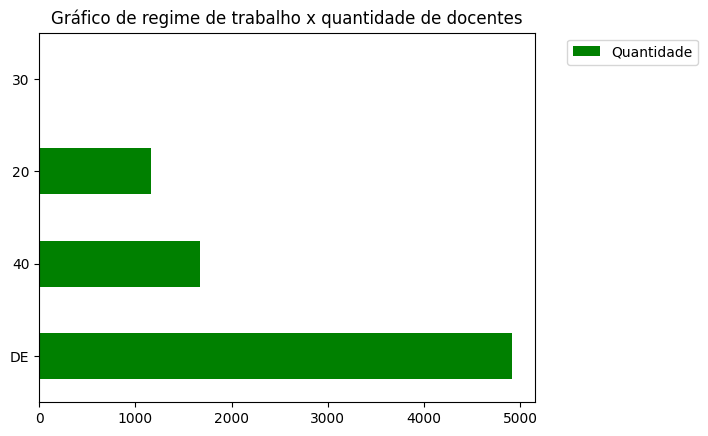

In [ ]:
d = dados.REGIME_TRABALHO.value_counts().plot(kind='barh', color='green')
d.legend(['Quantidade', 'Horas'], bbox_to_anchor=(1.05, 1), loc='upper left')
d.set_title('Gráfico de regime de trabalho x quantidade de docentes')

#Conclusão

>  Fazendo uma análise especialmente em relação ao gênero dos docentes da UFPE, é possível observar que mesmo as mulheres sendo maioria, por pouco, nas unidades das áreas exatas ainda são menoria gritante, alguns exemplos que pudemos observar foi o Centro de Informática e o Departamento de Física, a régua só muda quando vai para a área de humanas, como no curso de letras, e na área da saúde, como no curso de enfermagem.  
  Também é possível observar que existem menos mulheres doutoras do que homens, o que faz com que recebam menos quando tem o mesmo tempo de trabalho, já que possuem escolaridades diferentes, já que gênero não tem relação com capacidade intelectual o que faz essas mulheres terem menos o título de doutora que os homens? Esse é o principal ponto levantado pos essa análise. 
  No demais foi uma excelente base, muito bem alimentada e produzida, tenho expectativas de aumentar minha capacidade exploratória na próxima atividade avaliativa.

